### Imports

In [34]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

from display_clusters import scatter
pd.options.display.max_columns = 30

### Final cleaning and scale

In [35]:
recipe_topic_scores = pd.read_pickle('full_recipe_topic_scores.pkl')

In [36]:
recipe_topic_scores = recipe_topic_scores[recipe_topic_scores['minutes'] < 2000].reset_index(drop=True)

In [37]:
recipe_topic_scores = recipe_topic_scores[recipe_topic_scores['calories'] < 6000].reset_index(drop=True)

In [38]:
topic_scores = recipe_topic_scores.drop(['name', 'id'], axis=1)

In [39]:
topic_scores

,minutes,n_steps,n_ingredients,calories,healthy_eating,main_dish,american_kid_friendly,heavy_sauce,cookies_brownies,healthy_bread,chicken,cake_cupcake,soup_broth,potato,dessert_fruit,banana_bread,pies_cheesecake,rice_asian,hispanic,sweet_bread,muffins,salad,dairy,pancake_waffle,seafood,pizza_italian,red_meat
0,50,5,8,166.1,0.0763,0.0669,0.0453,0.0000,0.0009,0.0108,0.0083,0.0000,0.0656,0.0062,0.0000,0.0000,0.0000,0.0069,0.0000,0.0000,0.0000,0.0356,0.0903,0.0000,0.0029,0.0000,0.0166
1,35,7,6,575.3,0.0000,0.0109,0.0363,0.0001,0.0000,0.0208,0.0001,0.0084,0.0000,0.0000,0.1011,0.0209,0.0000,0.0010,0.0000,0.1271,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0012
2,5,4,4,276.3,0.0009,0.0058,0.0342,0.0000,0.0041,0.0000,0.0000,0.0956,0.0046,0.0000,0.0787,0.0484,0.0463,0.0000,0.0000,0.0000,0.0000,0.0000,0.0285,0.0000,0.0000,0.0000,0.0000
3,160,16,20,1260.7,0.0092,0.0128,0.0103,0.0816,0.0000,0.0002,0.0000,0.0000,0.0196,0.0221,0.0000,0.0014,0.0003,0.0000,0.0109,0.0000,0.0043,0.0543,0.0247,0.0042,0.0000,0.0014,0.0420
4,200,13,8,673.5,0.0565,0.1236,0.0000,0.0122,0.0000,0.0014,0.0232,0.0000,0.0000,0.0000,0.0016,0.0007,0.0005,0.0000,0.0004,0.0000,0.0000,0.0012,0.0000,0.0000,0.0545,0.0003,0.1354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2151,255,9,7,54.4,0.1637,0.0000,0.0172,0.0000,0.0000,0.0078,0.0048,0.0042,0.0000,0.0000,0.0000,0.0000,0.0015,0.0000,0.0000,0.0000,0.0015,0.1506,0.0000,0.0034,0.0467,0.0000,0.0049
2152,55,5,11,148.8,0.1830,0.0093,0.0000,0.0000,0.0000,0.0865,0.0084,0.0000,0.0036,0.0048,0.0000,0.0000,0.0000,0.0055,0.0274,0.0000,0.0000,0.1146,0.0236,0.0000,0.0000,0.0000,0.0000
2153,35,16,8,363.0,0.0011,0.0419,0.0481,0.0027,0.0000,0.0042,0.0001,0.0000,0.0000,0.0095,0.0000,0.0000,0.0000,0.0000,0.0057,0.0000,0.0000,0.0393,0.0011,0.2982,0.0000,0.0000,0.0000
2154,35,8,6,99.9,0.1262,0.0189,0.0581,0.0056,0.0055,0.0106,0.0094,0.0000,0.0000,0.0146,0.0000,0.0000,0.0000,0.0227,0.0000,0.0000,0.0010,0.1054,0.0266,0.0072,0.0142,0.0035,0.0003


In [40]:
std = StandardScaler()
topic_scores_sc = std.fit_transform(topic_scores)

### K-Means Clustering

In [41]:
num_clusters = 21
km = KMeans(n_clusters=num_clusters, random_state=42)
km.fit(topic_scores_sc)

KMeans(n_clusters=21, random_state=42)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2156 samples in 0.008s...
[t-SNE] Computed neighbors for 2156 samples in 0.362s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2156
[t-SNE] Computed conditional probabilities for sample 2000 / 2156
[t-SNE] Computed conditional probabilities for sample 2156 / 2156
[t-SNE] Mean sigma: 1.470215
[t-SNE] Computed conditional probabilities in 0.064s
[t-SNE] Iteration 50: error = 78.7598877, gradient norm = 0.0548201 (50 iterations in 0.556s)
[t-SNE] Iteration 100: error = 72.9568481, gradient norm = 0.0126172 (50 iterations in 0.383s)
[t-SNE] Iteration 150: error = 72.7891312, gradient norm = 0.0077012 (50 iterations in 0.357s)
[t-SNE] Iteration 200: error = 72.7218781, gradient norm = 0.0059085 (50 iterations in 0.333s)
[t-SNE] Iteration 250: error = 72.6959839, gradient norm = 0.0177917 (50 iterations in 0.357s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.695984
[t-SNE] Iteration 300: erro

(<Figure size 576x576 with 1 Axes>,
 [Text(-3.9470382, 27.255184, '0'),
  Text(-32.635666, -3.2786922, '1'),
  Text(7.6528044, -1.4974768, '2'),
  Text(42.5228, -10.516158, '3'),
  Text(50.61969, 30.510529, '4'),
  Text(7.2260823, -34.26072, '5'),
  Text(40.66902, 22.613743, '6'),
  Text(20.01338, 17.147533, '7'),
  Text(-22.528732, 40.327553, '8'),
  Text(-14.7715435, 61.89553, '9'),
  Text(-1.5547396, -56.0714, '10'),
  Text(-53.697273, -6.3280706, '11'),
  Text(22.362085, 40.008247, '12'),
  Text(3.513114, 43.662464, '13'),
  Text(-12.437949, 8.2579365, '14'),
  Text(-32.21089, -23.522966, '15'),
  Text(-10.237231, -20.534588, '16'),
  Text(-44.22554, 20.70319, '17'),
  Text(33.58588, -37.545082, '18'),
  Text(52.063995, 7.9325085, '19'),
  Text(-20.502398, -37.245255, '20')])

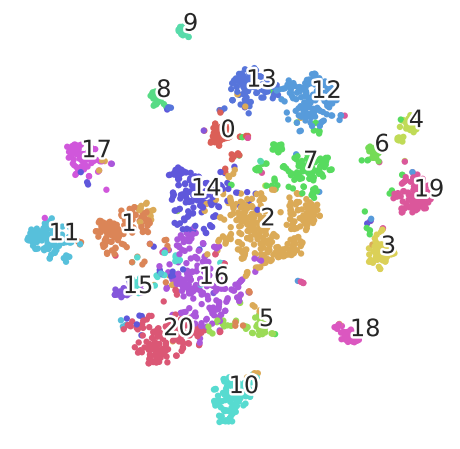

In [42]:
model = TSNE(n_components=2, random_state=42, verbose=2)
low_data = model.fit_transform(topic_scores_sc)

scatter(low_data, km.labels_, num_clusters)

In [43]:
for_tableau = pd.DataFrame(low_data).rename(columns={0: 'x', 1: 'y'})
for_tableau['cluster'] = km.labels_

In [44]:
for_tableau

,x,y,cluster
0,-9.830463,4.998837,14
1,9.544436,46.137344,13
2,19.031181,13.628922,7
3,-12.906466,-9.029746,16
4,3.576646,-57.048306,10
...,...,...,...
2151,18.216490,-9.567071,2
2152,19.244793,-6.643381,2
2153,-14.036012,62.342663,9
2154,17.483423,-2.662260,2


#### Interpretting Cluster Weights

In [45]:
km.cluster_centers_

array([[ 3.59778887e-01,  2.54516247e-01, -2.38748387e-01,
         6.51823886e-01,  4.12254584e-02, -7.45981411e-01,
         5.51185671e-01, -5.08421503e-01, -2.53135717e-01,
         4.95354891e+00, -4.26421048e-01, -2.38353741e-01,
        -3.30399446e-01, -2.61632367e-01, -7.12292221e-02,
        -2.70259324e-02, -7.32989337e-02, -3.21175813e-01,
        -3.84660478e-01,  5.63745982e-01,  1.59529950e-02,
        -3.57183790e-01, -3.67655961e-01, -1.36372843e-01,
        -2.37344217e-01,  1.44485257e-01, -3.67169427e-01],
       [ 1.11032429e-01, -3.03243348e-02,  6.57133567e-01,
        -8.17998945e-02,  2.57467239e-01,  6.31748870e-01,
        -2.48519279e-01, -2.63484950e-02, -3.21222801e-01,
        -3.02586641e-01,  5.08271923e-02, -2.82967153e-01,
        -5.21910735e-03, -2.84447445e-01, -3.81328019e-01,
        -1.62509364e-01, -2.26439505e-01, -3.85288349e-02,
         3.41742678e+00, -2.97977356e-01, -1.92975529e-01,
        -1.64811344e-01, -3.88159551e-04, -1.93425724e-

In [46]:
interpretting_var_impact_on_cluster = pd.DataFrame(km.cluster_centers_, columns=topic_scores.columns)

In [47]:
interpretting_var_impact_on_cluster

,minutes,n_steps,n_ingredients,calories,healthy_eating,main_dish,american_kid_friendly,heavy_sauce,cookies_brownies,healthy_bread,chicken,cake_cupcake,soup_broth,potato,dessert_fruit,banana_bread,pies_cheesecake,rice_asian,hispanic,sweet_bread,muffins,salad,dairy,pancake_waffle,seafood,pizza_italian,red_meat
0,0.359779,0.254516,-0.238748,0.651824,0.041225,-0.745981,0.551186,-0.508422,-0.253136,4.953549,-0.426421,-0.238354,-0.330399,-0.261632,-0.071229,-0.027026,-0.073299,-0.321176,-0.384660,0.563746,0.015953,-0.357184,-0.367656,-0.136373,-0.237344,0.144485,-0.367169
1,0.111032,-0.030324,0.657134,-0.081800,0.257467,0.631749,-0.248519,-0.026348,-0.321223,-0.302587,0.050827,-0.282967,-0.005219,-0.284447,-0.381328,-0.162509,-0.226440,-0.038529,3.417427,-0.297977,-0.192976,-0.164811,-0.000388,-0.193426,-0.208023,-0.141561,-0.188025
2,-0.303233,-0.392120,-0.216433,-0.348455,0.533292,-0.390614,-0.224656,-0.259111,-0.291137,-0.141183,-0.216260,-0.265816,-0.248378,-0.101348,-0.235005,-0.158895,-0.197659,-0.031697,-0.122480,-0.278188,-0.187853,1.452539,-0.168281,-0.104782,0.083776,-0.120750,-0.185835
3,-0.049346,0.250086,-0.030058,0.257732,-0.187592,-0.539033,0.418464,-0.481010,-0.223476,-0.312101,-0.287466,-0.137311,-0.275415,-0.272669,0.299066,0.084628,5.479983,-0.337841,-0.369977,-0.183584,-0.150018,-0.482777,-0.301019,-0.150017,-0.213074,0.080254,-0.350500
4,-0.307233,-0.032994,0.191227,-0.439161,-0.486557,-0.781204,0.822310,-0.498569,0.036002,-0.225850,-0.434983,-0.084686,-0.346307,-0.353977,0.382525,1.038194,-0.060607,-0.354615,-0.334714,-0.252879,6.168469,-0.496173,-0.300797,-0.106037,-0.239895,-0.151725,-0.364988
5,-0.212097,-0.258864,0.083890,-0.061239,0.453946,0.236094,-0.346406,-0.085847,-0.322669,-0.302488,0.075424,-0.283782,-0.238633,-0.242955,-0.208737,-0.138029,-0.226624,4.934490,0.317532,-0.330070,-0.228640,-0.136750,-0.405265,-0.181370,-0.122005,-0.165960,-0.220435
6,-0.134700,0.331366,0.324461,0.757672,-0.590757,-0.812082,0.721659,-0.486512,0.066509,1.122940,-0.438596,0.332338,-0.363929,-0.378352,0.105515,7.964068,-0.159774,-0.375038,-0.396186,-0.333400,0.562634,-0.535811,-0.380129,-0.113179,-0.230859,-0.176300,-0.380233
7,-0.223545,-0.278425,-0.487470,-0.113383,0.139125,-0.741898,0.277231,-0.438946,-0.028089,0.095111,-0.425133,0.027327,-0.334794,-0.310531,2.641802,0.088240,0.106828,-0.296492,-0.342758,-0.104992,0.019846,-0.488022,-0.223083,0.226457,-0.206375,-0.143418,-0.354724
8,-0.217833,0.090328,-0.020790,0.381531,0.275543,-0.246506,-0.401250,0.224574,-0.364980,-0.058578,-0.371259,-0.280148,-0.361339,-0.378352,-0.452142,-0.164088,-0.082260,-0.347626,-0.359983,0.438033,-0.222903,-0.351857,-0.276828,-0.164778,-0.268003,7.970963,-0.362401
9,-0.425398,-0.233499,-0.371566,-0.223199,-0.138633,-0.627062,-0.026194,-0.488391,-0.188974,-0.309718,-0.441097,-0.242004,-0.374780,-0.375940,0.041617,0.468267,-0.148815,-0.299472,-0.386159,-0.310938,-0.157472,-0.493622,-0.466130,8.437474,-0.274644,-0.183061,-0.394924


#### Adding Cluster to Recipe

In [48]:
recipe_topic_scores['cluster'] = km.labels_

In [49]:
recipe_topic_scores.head()

,name,id,minutes,n_steps,n_ingredients,calories,healthy_eating,main_dish,american_kid_friendly,heavy_sauce,cookies_brownies,healthy_bread,chicken,cake_cupcake,soup_broth,potato,dessert_fruit,banana_bread,pies_cheesecake,rice_asian,hispanic,sweet_bread,muffins,salad,dairy,pancake_waffle,seafood,pizza_italian,red_meat,cluster
0,how i got my family to eat spinach spinach cas...,25775,50,5,8,166.1,0.0763,0.0669,0.0453,0.0000,0.0009,0.0108,0.0083,0.0000,0.0656,0.0062,0.0000,0.0000,0.0000,0.0069,0.0000,0.0000,0.0000,0.0356,0.0903,0.0000,0.0029,0.0000,0.0166,14
1,land of nod cinnamon buns,22526,35,7,6,575.3,0.0000,0.0109,0.0363,0.0001,0.0000,0.0208,0.0001,0.0084,0.0000,0.0000,0.1011,0.0209,0.0000,0.0010,0.0000,0.1271,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0012,13
2,never weep whipped cream,74805,5,4,4,276.3,0.0009,0.0058,0.0342,0.0000,0.0041,0.0000,0.0000,0.0956,0.0046,0.0000,0.0787,0.0484,0.0463,0.0000,0.0000,0.0000,0.0000,0.0000,0.0285,0.0000,0.0000,0.0000,0.0000,7
3,real italian bolognese sauce,83950,160,16,20,1260.7,0.0092,0.0128,0.0103,0.0816,0.0000,0.0002,0.0000,0.0000,0.0196,0.0221,0.0000,0.0014,0.0003,0.0000,0.0109,0.0000,0.0043,0.0543,0.0247,0.0042,0.0000,0.0014,0.0420,16
4,ant kelly s london broil marinade,155959,200,13,8,673.5,0.0565,0.1236,0.0000,0.0122,0.0000,0.0014,0.0232,0.0000,0.0000,0.0000,0.0016,0.0007,0.0005,0.0000,0.0004,0.0000,0.0000,0.0012,0.0000,0.0000,0.0545,0.0003,0.1354,10


In [50]:
name_id_cluster = recipe_topic_scores[['name', 'id', 'cluster']].rename(columns={'name': 'recipe_name', 'cluster': 'cluster_check'})

In [51]:
name_id_cluster

,recipe_name,id,cluster_check
0,how i got my family to eat spinach spinach cas...,25775,14
1,land of nod cinnamon buns,22526,13
2,never weep whipped cream,74805,7
3,real italian bolognese sauce,83950,16
4,ant kelly s london broil marinade,155959,10
...,...,...,...
2151,zucchini marinata marinated zucchini salad,158292,2
2152,zucchini or yellow squash casserole,26557,2
2153,zucchini pancakes,16702,9
2154,zucchini ribbons with basil butter,34110,2


In [52]:
for_tableau = pd.concat([for_tableau, name_id_cluster], axis=1)

In [53]:
for_tableau.drop('cluster_check', axis=1, errors='ignore', inplace=True)

In [54]:
for_tableau.to_csv('cluster_graph.csv')

### Interpretting Clustered Recipes

In [55]:
cluster_avgs = recipe_topic_scores.groupby(['cluster'])[topic_scores.columns].mean().T

In [56]:
for topic_num in range(num_clusters):
    print(f'Topic Number {topic_num} \n', recipe_topic_scores[recipe_topic_scores['cluster'] == topic_num]['name'].sample(20).values, '\n')


Topic Number 0 
 ['cinnamon swirl raisin bread for bread machine'
 'ciabatta italian slipper bread' 'go go garlic bread'
 'cherry pie filling bread' 'italian peasant bread for bread machine'
 'the easiest bestest focaccia bread ever' 'honey i m home bread'
 'country white bread or dinner rolls bread machine'
 'julia child s white bread' 'amy s chocolate chip zucchini bread'
 'fabulous honey white bread bread machine'
 'extremely soft white bread bread machine'
 'crusty whole wheat italian bread' 'ciabatta bread'
 'the best bread machine challah'
 'awesome homemade crusty bread bread machine' 'lazy irish beer bread'
 'basic machine french bread' 'brioche loaf breadmaker lb loaf'
 'barb s best zucchini bread'] 

Topic Number 1 
 ['texas red enchilada sauce' 'baked beans don t get any better than this'
 'green un ripe tomato salsa for canning'
 'calico beans baked beans w kinds of beans'
 'crock pot stacked enchiladas' 'enchilada sauce'
 'sour cream salsa chicken for crock pot' 'cheese en

In [57]:
cluster_dict = {}

cluster_names = ['Healthy Bread', 'Hispanic', 'Simple and Healthy', 'Pies, Sweet and Savory', 'Muffins', \
                 'Rice Dishes', 'Banana Bread', 'Fruity Desserts', 'Pizza', 'Pancakes', 'Red Meat Entrees', \
                 'Soup', 'Cookies/Brownies/Little Desserts', 'Sweet Breads', 'Heavy Cheese/Cream', 'Stews and Roasts', \
                 'Heavy Sauce Entrees', 'Potato Sides', 'Fish Entrees', 'Cake/Cupcake/Big Desserts', 'Chicken Entrees']

for topic_num in range(num_clusters):
    top_3_topic_scores = []
    
    for index, value in cluster_avgs[topic_num][4:].sort_values(ascending=False).head(3).items():
        top_3_topic_scores.append((index, round(value, 3)))
        
    cluster_dict[topic_num] = {'Name': cluster_names[topic_num],
                               'Count': len(recipe_topic_scores[recipe_topic_scores['cluster'] == topic_num]),
                               'Time': round(cluster_avgs[topic_num][0], 2),
                               'Steps': round(cluster_avgs[topic_num][1], 2),
                               'Ingredients': round(cluster_avgs[topic_num][2], 2),
                               'Calories': round(cluster_avgs[topic_num][3], 2),
                               '1st Avg Topic Score': top_3_topic_scores[0],
                               '2nd Avg Topic Score': top_3_topic_scores[1],
                               '3rd Avg Topic Score': top_3_topic_scores[2],
                              }
                               
    
cluster_dict

{0: {'Name': 'Healthy Bread',
  'Count': 62,
  'Time': 142.92,
  'Steps': 11.21,
  'Ingredients': 8.02,
  'Calories': 715.25,
  '1st Avg Topic Score': ('healthy_bread', 0.274),
  '2nd Avg Topic Score': ('american_kid_friendly', 0.079),
  '3rd Avg Topic Score': ('healthy_eating', 0.04)},
 1: {'Name': 'Hispanic',
  'Count': 126,
  'Time': 103.72,
  'Steps': 9.52,
  'Ingredients': 11.24,
  'Calories': 384.65,
  '1st Avg Topic Score': ('hispanic', 0.185),
  '2nd Avg Topic Score': ('main_dish', 0.079),
  '3rd Avg Topic Score': ('healthy_eating', 0.052)},
 2: {'Name': 'Simple and Healthy',
  'Count': 332,
  'Time': 38.44,
  'Steps': 7.36,
  'Ingredients': 8.1,
  'Calories': 264.49,
  '1st Avg Topic Score': ('salad', 0.069),
  '2nd Avg Topic Score': ('healthy_eating', 0.066),
  '3rd Avg Topic Score': ('american_kid_friendly', 0.044)},
 3: {'Name': 'Pies, Sweet and Savory',
  'Count': 60,
  'Time': 78.45,
  'Steps': 11.18,
  'Ingredients': 8.77,
  'Calories': 537.66,
  '1st Avg Topic Score': (

In [58]:
tableau_tooltip = pd.DataFrame(cluster_dict).T.reset_index().rename(columns={'index': 'cluster_tt', 'name': 'cluster_name'})
tableau_tooltip.to_csv('tooltip.csv')

In [59]:
tableau_tooltip

,cluster_tt,Name,Count,Time,Steps,Ingredients,Calories,1st Avg Topic Score,2nd Avg Topic Score,3rd Avg Topic Score
0,0,Healthy Bread,62,142.92,11.21,8.02,715.25,"(healthy_bread, 0.274)","(american_kid_friendly, 0.079)","(healthy_eating, 0.04)"
1,1,Hispanic,126,103.72,9.52,11.24,384.65,"(hispanic, 0.185)","(main_dish, 0.079)","(healthy_eating, 0.052)"
2,2,Simple and Healthy,332,38.44,7.36,8.1,264.49,"(salad, 0.069)","(healthy_eating, 0.066)","(american_kid_friendly, 0.044)"
3,3,"Pies, Sweet and Savory",60,78.45,11.18,8.77,537.66,"(pies_cheesecake, 0.207)","(american_kid_friendly, 0.073)","(healthy_eating, 0.028)"
4,4,Muffins,48,37.81,9.5,9.56,223.61,"(muffins, 0.203)","(american_kid_friendly, 0.091)","(banana_bread, 0.036)"
5,5,Rice Dishes,51,52.8,8.16,9.18,393.92,"(rice_asian, 0.203)","(healthy_eating, 0.062)","(main_dish, 0.058)"
6,6,Banana Bread,24,65,11.67,10.04,762.95,"(banana_bread, 0.238)","(american_kid_friendly, 0.086)","(healthy_bread, 0.075)"
7,7,Fruity Desserts,148,51,8.04,7.12,370.42,"(dessert_fruit, 0.093)","(american_kid_friendly, 0.067)","(healthy_eating, 0.045)"
8,8,Pizza,30,51.9,10.23,8.8,593.44,"(pizza_italian, 0.294)","(healthy_eating, 0.053)","(american_kid_friendly, 0.036)"
9,9,Pancakes,26,19.19,8.31,7.54,320.93,"(pancake_waffle, 0.333)","(american_kid_friendly, 0.053)","(healthy_eating, 0.031)"


### Testing New Recipes for Recommendations

In [60]:
test_recipe_topic_scores = pd.read_pickle('test_recipe_topic_scores.pkl')

In [61]:
test_recipes = test_recipe_topic_scores.drop(['name', 'id'], axis=1)
test_recipes.head()

,minutes,n_steps,n_ingredients,calories,healthy_eating,main_dish,american_kid_friendly,heavy_sauce,cookies_brownies,healthy_bread,chicken,cake_cupcake,soup_broth,potato,dessert_fruit,banana_bread,pies_cheesecake,rice_asian,hispanic,sweet_bread,muffins,salad,dairy,pancake_waffle,seafood,pizza_italian,red_meat
0,15,9,8,596.2,0.0000,0.0881,0.0515,0.0189,0.0026,0.0151,0.0093,0.0000,0.0000,0.0054,0.0071,0.0000,0.0002,0.0431,0.0000,0.0000,0.0000,0.1058,0.0167,0.0000,0.0490,0.0025,0.0000
1,25,9,3,84.8,0.0000,0.0000,0.1163,0.0000,0.0881,0.0008,0.0020,0.0166,0.0001,0.0014,0.0249,0.0000,0.0019,0.0000,0.0000,0.0900,0.0057,0.0000,0.0069,0.0157,0.0086,0.0033,0.0014
2,20,14,10,345.2,0.0023,0.0000,0.1334,0.0000,0.0033,0.0000,0.0000,0.0054,0.0000,0.0000,0.0020,0.0062,0.0013,0.0000,0.2181,0.0000,0.0000,0.0000,0.0482,0.0000,0.0000,0.0000,0.0000
3,80,28,13,137.4,0.0106,0.0000,0.0070,0.0104,0.0000,0.0000,0.0000,0.0320,0.0000,0.0190,0.0015,0.0000,0.0015,0.0000,0.0048,0.0109,0.0009,0.0006,0.0538,0.0000,0.0000,0.0000,0.0008
4,8,6,7,156.9,0.0373,0.0487,0.0274,0.0000,0.0114,0.0019,0.0034,0.0000,0.0000,0.0103,0.0114,0.0000,0.0000,0.0062,0.0170,0.0013,0.0000,0.0103,0.0263,0.0000,0.0157,0.0030,0.0000


In [62]:
testing_recipe = test_recipe_topic_scores.sample(1)

In [63]:
testing_recipe

,name,id,minutes,n_steps,n_ingredients,calories,healthy_eating,main_dish,american_kid_friendly,heavy_sauce,cookies_brownies,healthy_bread,chicken,cake_cupcake,soup_broth,potato,dessert_fruit,banana_bread,pies_cheesecake,rice_asian,hispanic,sweet_bread,muffins,salad,dairy,pancake_waffle,seafood,pizza_italian,red_meat
302,the best rice pudding,76453,95,5,8,323.7,0.0088,0.0247,0.0291,0.0,0.0,0.0,0.0,0.0008,0.0,0.0,0.092,0.0233,0.0065,0.1926,0.0,0.0,0.0,0.0,0.0,0.0004,0.0,0.0,0.0


In [64]:
testing_recipe_sc = std.transform(testing_recipe.iloc[:, 2:])
int(km.predict(testing_recipe_sc))

5

In [65]:
def recipe_recommender(test_recipe):
    
    test_recipe_sc = std.transform(test_recipe.iloc[:, 2:])
    cluster = int(km.predict(test_recipe_sc))
    
    similar_recipes = name_id_cluster[name_id_cluster['cluster_check'] == cluster]
    
    return similar_recipes.sample(1)

In [66]:
recipe_recommender(testing_recipe)

,recipe_name,id,cluster_check
1328,minado s perfect sushi rice,119373,5
